In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

sns.set()

import common
import evaluate
import nba.importer as importer

In [10]:
test_file = f"output\\nba\\test\\train.csv"
model_file = f"models\\nba\\model.pkl"

model = common.load_model(model_file)
data, y = common.read_data_from_file(test_file, "home_win", ["counter", "home_win"])

In [11]:
X = data.drop(["year", "date", "away", "home"], axis=1, inplace=False)
y_predicted = model.predict(X)

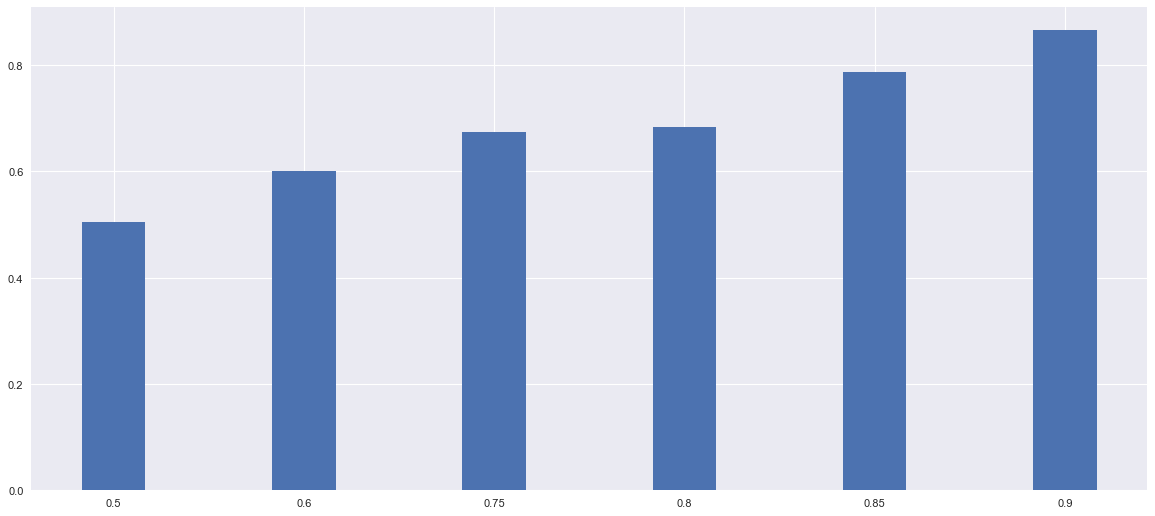

In [12]:
stats = common.confidence_stats(model, X, y)

ranges = []
pcts = []
cords = []

counter = 1
for s in stats:
    ranges.append(s.conf_range[0])
    pcts.append(s.pct)
    cords.append(counter)
    counter += 3

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(cords, pcts, width=1, tick_label=ranges)
#plt.xticks(rotation=70)
plt.show()

In [13]:
def team_summary(data):
    
    def update_records(team_stat):
        pct = team_stat["correct"] / team_stat["total"]
        real_pct = team_stat["real"] / team_stat["total"]

        team_stat["record"] = real_pct
        team_stat["betting"] = pct

    total = 0
    correct = 0

    teams = {}

    for index, row in data.iterrows():

        features = [X.iloc[index]]

        predicted = model.predict(features)[0]
        real = y.iloc[index]

        confidences = model.predict_proba(features)[0]
        max_confidence = max(confidences)

        total += 1

        if real == predicted: correct += 1

        home = row["home"]
        away = row["away"]

        if home not in teams: teams[home]={"correct":0, "total":0, "real":0}
        if away not in teams: teams[away]={"correct":0, "total":0, "real":0}

        home_team = teams[home]
        away_team = teams[away]

        if real == 1 and predicted == 1:
            home_team["correct"] += 1
            away_team["correct"] += 1
        if real == 0 and predicted == 0:
            home_team["correct"] += 1
            away_team["correct"] += 1
        if real == 1:
            home_team["real"] += 1
        if real == 0:
            away_team["real"] += 1

        home_team["total"] += 1
        away_team["total"] += 1

        update_records(home_team)
        update_records(away_team)
        
        #print(f"{correct}/{total} = {correct/total:.4f}")
        
    return teams

In [14]:
import operator
import matplotlib.pyplot as plt

teams = team_summary(data)

#print("{0:<30} {1} {2}".format("team", "win %", "bet %"))

names = []
betting = []
record = []
cords = []
cords_betting = []
counter = 0

for k in sorted(teams.items(), key=lambda d: d[1]["correct"]/d[1]["total"]):
    team_name = k[0]
    team_stat = k[1]
    
    pct = team_stat["correct"] / team_stat["total"]
    real_pct = team_stat["real"] / team_stat["total"]
    
    names.append(team_name)
    betting.append(pct)
    record.append(real_pct)
    
    cords.append(counter * 10)
    cords_betting.append(counter * 10 + 2)
    counter += 1
    
    #print(f"{team_name:<30} {real_pct:.2f}  {pct:.2f}")

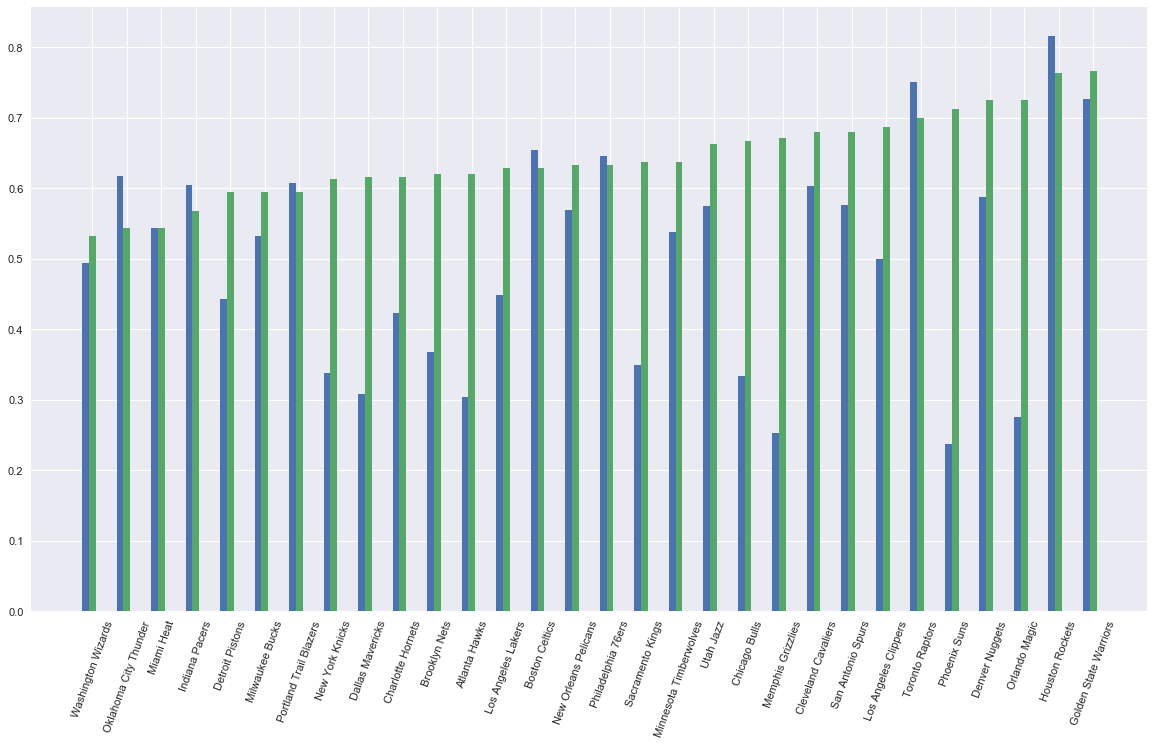

In [15]:
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.bar(cords, record, width=2, tick_label=names)
plt.bar(cords_betting, betting, width=2, tick_label=names)
plt.xticks(rotation=70)
plt.show()

In [16]:
result_file = "input\\nba\\2018.csv"

_, stats = importer.generate_output_and_stats(2018, result_file)

results = pd.read_csv(result_file)
results.head()

,Date,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Unnamed: 6,Unnamed: 7,Attend.,Notes
0,Tue Oct 16 2018,8:00p,Philadelphia 76ers,87,Boston Celtics,105,Box Score,NaN,18624.0,NaN
1,Tue Oct 16 2018,10:30p,Oklahoma City Thunder,100,Golden State Warriors,108,Box Score,NaN,19596.0,NaN
2,Wed Oct 17 2018,7:00p,Milwaukee Bucks,113,Charlotte Hornets,112,Box Score,NaN,17889.0,NaN
3,Wed Oct 17 2018,7:00p,Brooklyn Nets,100,Detroit Pistons,103,Box Score,NaN,20332.0,NaN
4,Wed Oct 17 2018,8:00p,New Orleans Pelicans,131,Houston Rockets,112,Box Score,NaN,18055.0,NaN


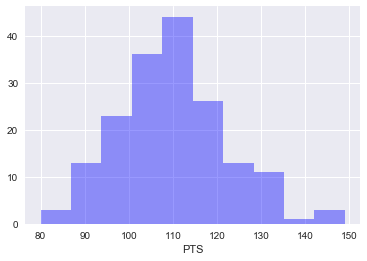

In [17]:
sns.distplot(results['PTS'], bins=10, kde=False, color="blue")

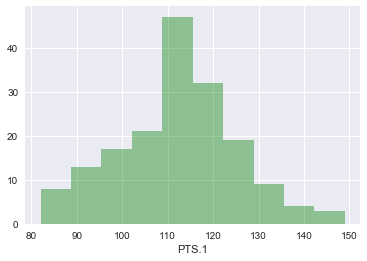

In [18]:
sns.distplot(results['PTS.1'], bins=10, kde=False, color="green")

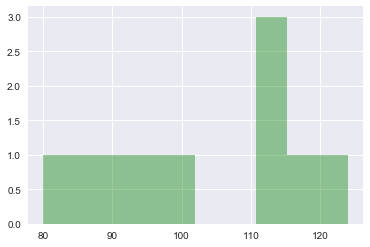

In [19]:
sns.distplot(stats["Houston Rockets"]["scored"], bins=10, kde=False, color="green")

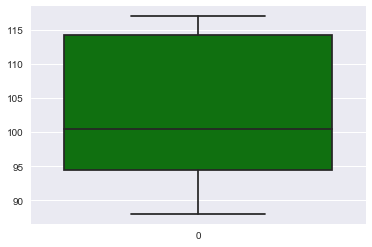

In [20]:
sns.boxplot(data=stats["Orlando Magic"]["scored"], color="green")

In [21]:
def team_summary(stats, team_name):
    print(team_name)
    print(stats[team_name]["scored"])
    print(stats[team_name]["allowed"])
    print(["W" if x == 1 else "L" for x in stats[team_name]["wins"]])
    sns.boxplot(data=stats[team_name]["scored"], color="blue")
    plt.show()

Phoenix Suns
[121, 91, 103, 113, 96, 110, 90, 98, 102, 82, 109]
[100, 119, 123, 131, 117, 117, 120, 107, 100, 104, 116]
['W', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'W', 'L', 'L']


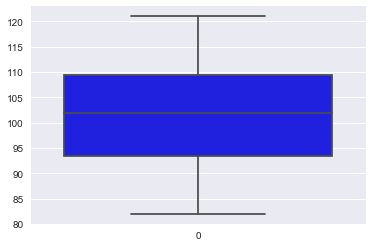


vs

New Orleans Pelicans
[131, 149, 116, 117, 111, 111, 121, 119, 95, 116, 107]
[112, 129, 109, 115, 132, 116, 131, 132, 109, 122, 98]
['W', 'W', 'W', 'W', 'L', 'L', 'L', 'L', 'L', 'L', 'W']


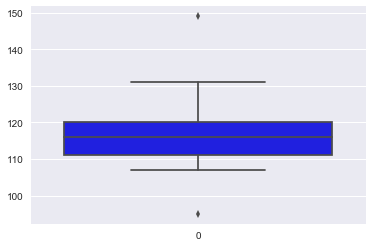

In [24]:
team_summary(stats, "Phoenix Suns")
print()
print("vs")
print()
team_summary(stats, "New Orleans Pelicans")

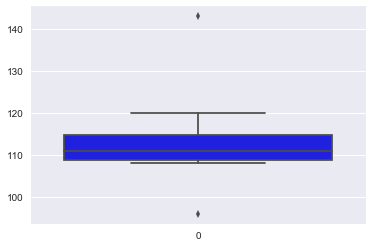

In [65]:
sns.boxplot(data=stats["San Antonio Spurs"]["scored"], color="blue")

In [66]:
stats["San Antonio Spurs"]["scored"]

[112, 108, 143, 96, 110, 113, 120, 109]